# CO2, Temperature and Disaster Classification Analysis





### We have amalgamated 3 datasets for this experiment. The three datasets are Co2 dataset, Temperature dataset and Disaster dataset for different countries. <br> We have tried to predict the disasters based on change in temeperature and change in co2. <br> We think that more attributes would have provided more accurate results. We have used the datasets to predict the natural disaster as the natural disaster affects the agriculture growth and this will be helpful in our future research and experiments.  We tried to find the precipitation data, but the dataset which we found seems to be inaccurate (WorldBank). We will try furthure to find appropriate precipitation data to be included in our project.


##### We Found crop data set. It have several attributes which contributes toward the growth of crops. With the help of those attributes we have tried to suggest the right crop for a particular attribute group.

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
#mydrive = "/content/drive/My Drive/ML-Summer-2023/The Martians/Data/GlobalLandTemperaturesByCountry.csv"
profdrive="/content/drive/MyDrive/ML-Summer-2023/The Martians/Data"
file_name1="Disaster_data/temperature_data.csv"
file_name2="Disaster_data/Climate-related_Disasters_Frequency.csv"
file_name3="FT2021_fossil_CO2_booklet_2022.xlsx"
file_name4="country_codes.csv"
#file_name5="Disaster_data/1970-2021_DISASTERS.csv"
file_name6="Disaster_data/crop_data.csv"
import os
os.chdir(profdrive)

In [ ]:
os.listdir(profdrive+"/Disaster_data")

['Climate-related_Disasters_Frequency.csv',
 'all countries global temperature.csv',
 'temperature_data.csv',
 '1970-2021_DISASTERS.csv',
 'crop_data.csv',
 'arable_land.csv',
 'pesticides.csv',
 'fertilizer.csv']

In [ ]:
data_crop=pd.read_csv(file_name6)

In [ ]:
# Co2 data
data_co2= pd.read_excel(file_name3,sheet_name="fossil_CO2_totals_by_country")
# temperature data
data_temp= pd.read_csv(file_name1, encoding='cp1252')
# Disaster data
data_disaster = pd.read_csv(file_name2)
#Country code data
data_country_code=pd.read_csv(file_name4)


In [ ]:
data_co2.head(10)

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CO2,ABW,Aruba,0.081876,0.081889,0.095415,0.099630,0.089089,0.105139,0.096041,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
1,CO2,AFG,Afghanistan,1.739541,1.737823,1.715749,1.742813,2.198551,2.037627,1.899895,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669
2,CO2,AGO,Angola,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,...,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057
3,CO2,AIA,Anguilla,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,...,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409
4,CO2,AIR,International Aviation,169.300997,169.300997,179.147487,186.892096,179.793331,173.866020,174.273791,...,472.721119,480.909126,496.627697,524.654035,548.207777,582.230490,609.630469,617.763229,338.144083,390.166250
5,CO2,ALB,Albania,4.814516,4.814828,5.498804,4.939869,5.319746,5.414438,5.785733,...,4.574328,4.811345,5.134697,4.916119,4.619508,5.346925,5.314989,5.038618,4.706920,4.591114
6,CO2,ANT,Curaçao,14.518554,14.518600,14.117424,15.611509,14.126853,10.199643,10.852042,...,5.130824,4.685495,5.258291,5.311484,4.549638,3.619474,2.877022,2.210520,1.831085,2.035324
7,CO2,ARE,United Arab Emirates,19.437564,25.404108,27.718761,35.806205,35.971039,36.642262,45.538708,...,186.055273,195.609010,197.236888,207.795426,212.560271,208.686109,187.917028,199.288854,189.338024,193.506940
8,CO2,ARG,Argentina,88.321009,88.765100,90.716408,93.698462,93.987211,91.411464,96.029610,...,191.774376,198.151363,195.952635,199.417385,197.383313,194.257588,192.035129,183.172298,171.863250,189.002028
9,CO2,ARM,Armenia,10.881938,10.902720,11.705779,12.750140,13.788498,15.159544,15.655364,...,5.877812,5.565062,5.556373,5.414477,5.159294,5.453925,5.771486,6.258425,6.376823,6.769803


In [ ]:
def removeDataWithoutCode(df,code):

  df_ = df[df[code].notna()]
  df_=df_[~(df_[code]=='')]

  df_ = df_[df_[code].isin(data_country_code['Code'])]
  return df_

In [ ]:
def trimDataFrame(df,start,end):
  df_trimmed= (
      df
      .query(f'Year > {start} and Year < {end}')
  )

  return df_trimmed

In [ ]:
data_co2_country=removeDataWithoutCode(data_co2,"EDGAR Country Code")

In [ ]:
data_co2_country[data_co2_country['EDGAR Country Code']=='AFG']

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,CO2,AFG,Afghanistan,1.739541,1.737823,1.715749,1.742813,2.198551,2.037627,1.899895,...,10.238064,8.484183,8.01629,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669


In [ ]:
data_co2_country= data_co2_country.rename(columns={'EDGAR Country Code':'Code'})
data_co2_country.drop('Substance', inplace=True, axis =1)
data_co2_country.drop('Country', inplace=True, axis =1)

In [ ]:
data_co2_country.head(2)

,Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ABW,0.081876,0.081889,0.095415,0.099630,0.089089,0.105139,0.096041,0.105305,0.106662,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
1,AFG,1.739541,1.737823,1.715749,1.742813,2.198551,2.037627,1.899895,2.288853,1.940763,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669


In [ ]:
df_co2_ = pd.melt(data_co2_country, id_vars=['Code'] , var_name='Year', value_name ='C02')


In [ ]:
df_co2_[df_co2_['Code']=='AFG']

,Code,Year,C02
1,AFG,1970,1.739541
207,AFG,1971,1.737823
413,AFG,1972,1.715749
619,AFG,1973,1.742813
825,AFG,1974,2.198551
1031,AFG,1975,2.037627
1237,AFG,1976,1.899895
1443,AFG,1977,2.288853
1649,AFG,1978,1.940763
1855,AFG,1979,2.066211


In [ ]:
df_co2_['change_CO2']=df_co2_.groupby('Code')['C02'].diff()

In [ ]:
df_co2_[df_co2_['Code']=='USA']

,Code,Year,C02,change_CO2
194,USA,1970,4693.300240,NaN
400,USA,1971,4556.628536,-136.671704
606,USA,1972,4805.782899,249.154363
812,USA,1973,4993.579237,187.796338
1018,USA,1974,4828.733417,-164.845820
1224,USA,1975,4615.234021,-213.499396
1430,USA,1976,4909.768543,294.534522
1636,USA,1977,5073.859718,164.091175
1842,USA,1978,5064.535787,-9.323931
2048,USA,1979,5103.595370,39.059582


In [ ]:
data_temp_clean=data_temp[['Area Code (ISO3)', 'Area', 'Year','Value']]

In [ ]:
data_temp_clean.head()

,Area Code (ISO3),Area,Year,Value
0,AFG,Afghanistan,1970,0.813
1,AFG,Afghanistan,1971,0.619
2,AFG,Afghanistan,1972,-1.124
3,AFG,Afghanistan,1973,0.232
4,AFG,Afghanistan,1974,-0.489


In [ ]:
data_temp_country=removeDataWithoutCode(data_temp_clean,"Area Code (ISO3)")

In [ ]:
data_temp_country=data_temp_country.rename(columns={"Area Code (ISO3)":"Code","Value":"Change_temp"})

In [ ]:
data_temp_country.head()

,Code,Area,Year,Change_temp
0,AFG,Afghanistan,1970,0.813
1,AFG,Afghanistan,1971,0.619
2,AFG,Afghanistan,1972,-1.124
3,AFG,Afghanistan,1973,0.232
4,AFG,Afghanistan,1974,-0.489


In [ ]:
data_disaster.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,2,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,4,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0
4,5,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN


In [ ]:
disaster=list(data_disaster["Indicator"].unique())

In [ ]:
disaster

['Climate related disasters frequency, Number of Disasters: Drought',
 'Climate related disasters frequency, Number of Disasters: Extreme temperature',
 'Climate related disasters frequency, Number of Disasters: Flood',
 'Climate related disasters frequency, Number of Disasters: Landslide',
 'Climate related disasters frequency, Number of Disasters: Storm',
 'Climate related disasters frequency, Number of Disasters: TOTAL',
 'Climate related disasters frequency, Number of Disasters: Wildfire']

In [ ]:
result =list( map(lambda x: x.split(":")[-1].strip(), disaster))

In [ ]:
result

['Drought',
 'Extreme temperature',
 'Flood',
 'Landslide',
 'Storm',
 'TOTAL',
 'Wildfire']

In [ ]:
data_disaster['Indicator'] = data_disaster['Indicator'].replace(disaster,result)

In [ ]:
data_disaster.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1980', 'F1981',
       'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987', 'F1988', 'F1989',
       'F1990', 'F1991', 'F1992', 'F1993', 'F1994', 'F1995', 'F1996', 'F1997',
       'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005',
       'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013',
       'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021',
       'F2022'],
      dtype='object')

In [ ]:
data_disaster=data_disaster.rename(columns={'ISO3':"Code",'F1980':"1980", 'F1981':"1981",
       'F1982':"1982", 'F1983':"1983", 'F1984':"1984", 'F1985':"1985", 'F1986':"1986", 'F1987':"1987", 'F1988':"1988", 'F1989':"1989",
       'F1990':"1990", 'F1991':"1991", 'F1992':"1992", 'F1993':"1993", 'F1994':"1994", 'F1995':"1995", 'F1996':"1996", 'F1997':"1997",
       'F1998':"1998", 'F1999':"1999", 'F2000':"2000", 'F2001':"2001", 'F2002':"2002", 'F2003':"2003", 'F2004':"2004", 'F2005':"2005",
       'F2006': "2006", 'F2007':"2007", 'F2008':"2008", 'F2009':"2009", 'F2010':"2010", 'F2011':"2011", 'F2012':"2012", 'F2013':"2013",
       'F2014':"2014", 'F2015':"2015", 'F2016':"2016", 'F2017':"2017", 'F2018':"2018", 'F2019':"2019", 'F2020':"2020", 'F2021':"2021",
       'F2022':"2022"})

In [ ]:
data_disaster.fillna(0,inplace=True)

In [ ]:
data_disaster=data_disaster[['Country','Code', 'Indicator', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022']]

In [ ]:
data_disaster_clean=data_disaster[data_disaster["Indicator"]!="TOTAL"]

In [ ]:
data_disaster_clean.head()

,Country,Code,Indicator,1980,1981,1982,1983,1984,1985,1986,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",AFG,Drought,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,"Afghanistan, Islamic Rep. of",AFG,Extreme temperature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Afghanistan, Islamic Rep. of",AFG,Flood,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,"Afghanistan, Islamic Rep. of",AFG,Landslide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0
4,"Afghanistan, Islamic Rep. of",AFG,Storm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data_disaster_country=removeDataWithoutCode(data_disaster_clean,"Code")

In [ ]:
data_disaster_country

,Country,Code,Indicator,1980,1981,1982,1983,1984,1985,1986,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",AFG,Drought,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,"Afghanistan, Islamic Rep. of",AFG,Extreme temperature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Afghanistan, Islamic Rep. of",AFG,Flood,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,"Afghanistan, Islamic Rep. of",AFG,Landslide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0
4,"Afghanistan, Islamic Rep. of",AFG,Storm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,Zambia,ZMB,Flood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0
964,Zambia,ZMB,Landslide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
966,Zimbabwe,ZWE,Drought,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
967,Zimbabwe,ZWE,Flood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
print("Countries in CO2 dataset:",df_co2_["Code"].nunique())
print("Countries in temperature dataset:",data_temp_country["Code"].nunique())
print("Countries in disaster dataset:",data_disaster_country["Code"].nunique())

Countries in CO2 dataset: 206
Countries in temperature dataset: 234
Countries in disaster dataset: 208


## Common countries in all the datasets

In [ ]:
all_country=set(data_co2_country["Code"]).intersection(set(data_temp_country["Code"]),set(data_disaster_country["Code"]))
len(all_country)

189

In [ ]:
data_disaster_country=data_disaster_country[data_disaster_country["Code"] .isin(all_country)]
data_disaster_country["Code"].nunique()

189

In [ ]:
data_temp_country=data_temp_country[data_temp_country["Code"] .isin(all_country)]
data_temp_country["Code"].nunique()

189

In [ ]:
data_temp_trim=trimDataFrame(data_temp_country,1979,2022)


In [ ]:
data_temp_trim.head()

,Code,Area,Year,Change_temp
10,AFG,Afghanistan,1980,0.600
11,AFG,Afghanistan,1981,0.483
12,AFG,Afghanistan,1982,-0.346
13,AFG,Afghanistan,1983,0.164
14,AFG,Afghanistan,1984,0.145


In [ ]:
df_co2_=df_co2_[df_co2_["Code"] .isin(all_country)]
df_co2_["Code"].nunique()

189

In [ ]:
data_co2_trim=trimDataFrame(df_co2_,1979,2022)

In [ ]:
data_co2_trim.head()

,Code,Year,C02,change_CO2
2061,AFG,1980,2.016268,-0.049944
2062,AGO,1980,14.342032,0.137659
2063,AIA,1980,0.004413,0.001200
2064,ALB,1980,8.064026,0.138495
2065,ARE,1980,41.120682,3.266586


In [ ]:
data_disaster_country.drop(["Country"], axis=1, inplace=True)

<ipython-input-47-651c6ca16638>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_disaster_country.drop(["Country"], axis=1, inplace=True)


In [ ]:
data_disaster_country.head()

,Code,Indicator,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AFG,Drought,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,AFG,Extreme temperature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,Flood,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,AFG,Landslide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0
4,AFG,Storm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_new_dis_ = pd.melt(data_disaster_country, id_vars=['Code','Indicator'] , var_name='Year', value_name ='Disaster')

df_pivoted = df_new_dis_.pivot(index=['Code', 'Year'], columns='Indicator', values='Disaster')
df_flattened = df_pivoted.reset_index()
df_flattened = df_flattened.rename_axis(None, axis=1)

In [ ]:
df_flattened.columns

Index(['Code', 'Year', 'Drought', 'Extreme temperature', 'Flood', 'Landslide',
       'Storm', 'Wildfire'],
      dtype='object')

In [ ]:
df_flattened.fillna(0,inplace=True)

In [ ]:
for y in ['Drought', 'Extreme temperature', 'Flood', 'Landslide',
       'Storm', 'Wildfire']:
       df_flattened[y]=df_flattened[y].astype(int)


In [ ]:
df_flattened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Code                 8127 non-null   object
 1   Year                 8127 non-null   object
 2   Drought              8127 non-null   int64 
 3   Extreme temperature  8127 non-null   int64 
 4   Flood                8127 non-null   int64 
 5   Landslide            8127 non-null   int64 
 6   Storm                8127 non-null   int64 
 7   Wildfire             8127 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 508.1+ KB


In [ ]:
df_flattened.isna().sum()

Code                   0
Year                   0
Drought                0
Extreme temperature    0
Flood                  0
Landslide              0
Storm                  0
Wildfire               0
dtype: int64

In [ ]:
df_flattened

,Code,Year,Drought,Extreme temperature,Flood,Landslide,Storm,Wildfire
0,AFG,1980,0,0,1,0,0,0
1,AFG,1981,0,0,0,0,0,0
2,AFG,1982,0,0,0,0,0,0
3,AFG,1983,0,0,0,0,0,0
4,AFG,1984,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
8122,ZWE,2018,0,0,0,0,0,0
8123,ZWE,2019,0,0,1,0,1,0
8124,ZWE,2020,0,0,0,0,0,0
8125,ZWE,2021,1,0,0,0,1,0


In [ ]:
df_flattened.fillna(0,inplace=True)

In [ ]:
df_flattened

,Code,Year,Drought,Extreme temperature,Flood,Landslide,Storm,Wildfire
0,AFG,1980,0,0,1,0,0,0
1,AFG,1981,0,0,0,0,0,0
2,AFG,1982,0,0,0,0,0,0
3,AFG,1983,0,0,0,0,0,0
4,AFG,1984,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
8122,ZWE,2018,0,0,0,0,0,0
8123,ZWE,2019,0,0,1,0,1,0
8124,ZWE,2020,0,0,0,0,0,0
8125,ZWE,2021,1,0,0,0,1,0


In [ ]:
data_temp_trim['Year']=data_temp_trim['Year'].astype(int);
data_co2_trim['Year']=data_co2_trim['Year'].astype(int);
df_flattened['Year']=df_flattened['Year'].astype(int);
df_n = pd.merge(data_temp_trim, data_co2_trim, on=['Year','Code'])
df_merge = pd.merge(df_flattened, df_n, on=['Year','Code'])

<ipython-input-58-4ddab93e9cf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp_trim['Year']=data_temp_trim['Year'].astype(int);
<ipython-input-58-4ddab93e9cf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_co2_trim['Year']=data_co2_trim['Year'].astype(int);


In [ ]:
df_merge

,Code,Year,Drought,Extreme temperature,Flood,Landslide,Storm,Wildfire,Area,Change_temp,C02,change_CO2
0,AFG,1980,0,0,1,0,0,0,Afghanistan,0.600,2.016268,-0.049944
1,AFG,1981,0,0,0,0,0,0,Afghanistan,0.483,2.269086,0.252818
2,AFG,1982,0,0,0,0,0,0,Afghanistan,-0.346,2.319190,0.050104
3,AFG,1983,0,0,0,0,0,0,Afghanistan,0.164,3.010081,0.690892
4,AFG,1984,0,0,0,0,0,0,Afghanistan,0.145,3.229588,0.219507
...,...,...,...,...,...,...,...,...,...,...,...,...
7571,ZWE,2017,1,0,0,0,1,0,Zimbabwe,0.088,10.540316,-0.772276
7572,ZWE,2018,0,0,0,0,0,0,Zimbabwe,0.453,12.730372,2.190056
7573,ZWE,2019,0,0,1,0,1,0,Zimbabwe,0.925,12.088218,-0.642153
7574,ZWE,2020,0,0,0,0,0,0,Zimbabwe,0.389,11.443394,-0.644824


In [ ]:
df_merge=df_merge.dropna()

In [ ]:
df_merge.loc[df_merge['Drought'] > 1, 'Drought'] = 1
df_merge.loc[df_merge['Extreme temperature'] > 1, 'Extreme temperature'] = 1
df_merge.loc[df_merge['Flood'] > 1, 'Flood'] = 1
df_merge.loc[df_merge['Landslide'] > 1, 'Landslide'] = 1
df_merge.loc[df_merge['Storm'] > 1, 'Storm'] = 1
df_merge.loc[df_merge['Wildfire'] > 1, 'Wildfire'] = 1

In [ ]:
df_merge

,Code,Year,Drought,Extreme temperature,Flood,Landslide,Storm,Wildfire,Area,Change_temp,C02,change_CO2
0,AFG,1980,0,0,1,0,0,0,Afghanistan,0.600,2.016268,-0.049944
1,AFG,1981,0,0,0,0,0,0,Afghanistan,0.483,2.269086,0.252818
2,AFG,1982,0,0,0,0,0,0,Afghanistan,-0.346,2.319190,0.050104
3,AFG,1983,0,0,0,0,0,0,Afghanistan,0.164,3.010081,0.690892
4,AFG,1984,0,0,0,0,0,0,Afghanistan,0.145,3.229588,0.219507
...,...,...,...,...,...,...,...,...,...,...,...,...
7571,ZWE,2017,1,0,0,0,1,0,Zimbabwe,0.088,10.540316,-0.772276
7572,ZWE,2018,0,0,0,0,0,0,Zimbabwe,0.453,12.730372,2.190056
7573,ZWE,2019,0,0,1,0,1,0,Zimbabwe,0.925,12.088218,-0.642153
7574,ZWE,2020,0,0,0,0,0,0,Zimbabwe,0.389,11.443394,-0.644824


In [ ]:
df_merge.to_csv('/content/drive/MyDrive/ML-Summer-2023/The Martians/Data/newdata.csv', index=False)

In [ ]:
df_merge.count()

Code                   7420
Year                   7420
Drought                7420
Extreme temperature    7420
Flood                  7420
Landslide              7420
Storm                  7420
Wildfire               7420
Area                   7420
Change_temp            7420
C02                    7420
change_CO2             7420
dtype: int64

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7420 entries, 0 to 7575
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 7420 non-null   object 
 1   Year                 7420 non-null   int64  
 2   Drought              7420 non-null   int64  
 3   Extreme temperature  7420 non-null   int64  
 4   Flood                7420 non-null   int64  
 5   Landslide            7420 non-null   int64  
 6   Storm                7420 non-null   int64  
 7   Wildfire             7420 non-null   int64  
 8   Area                 7420 non-null   object 
 9   Change_temp          7420 non-null   float64
 10  C02                  7420 non-null   float64
 11  change_CO2           7420 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 753.6+ KB


Data is very imbalanced based on categories

In [ ]:
features = df_merge[['Change_temp', 'change_CO2']]
label = df_merge[['Drought', 'Extreme temperature', 'Flood', 'Landslide', 'Storm', 'Wildfire']]
X,y=(features,label)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = StandardScaler().fit_transform(X)
le = LabelEncoder()
y = y.apply(le.fit_transform)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)
#x_train, x_test, y_train, y_test = train_test_split(features,label,test_size = 0.2,random_state =2)

#The Muller Loop

In [ ]:



# Load data
#data = pd.read_csv('multi_level_data.csv')

# Define input and output variables
#X = data[['Change_temp', 'change_CO2']]
#y = data.drop(['Code', 'Year', 'Change_temp', 'change_CO2'], axis=1)

# Convert string labels to numerical values


# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert y arrays to 1D arrays of class labels
y_train = y_train.values.argmax(axis=1)
y_test = y_test.values.argmax(axis=1)

names = ["Decision Tree", "Random Forest","Linear SVM","Multi-layer Perceptron", "AdaBoost", #"Neural Net"
         "Naive Bayes", "QDA"]#"XG Boost Classifier"
# Train decision tree classifier
classifiers = [DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5),RandomForestClassifier(),SVC(),MLPClassifier(), AdaBoostClassifier(),
    GaussianNB(),#xgb.XGBClassifier(),
    QuadraticDiscriminantAnalysis()]

max_score = 0.0
max_class = ''
timetaken=[]
score_all=[]
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)

#    accuracy =  np.mean(y_pred == y_test)100.0 *
#print("Accuracy:", accuracy)
    score = 100.0 * clf.score(X_test, y_test)
    score_all.append(score)
    timetaken.append((time.time() - start_time))
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))




Classifier = Decision Tree, Score (test, accuracy) = 60.11, Training time = 0.03 seconds
Classifier = Random Forest, Score (test, accuracy) = 53.57, Training time = 1.32 seconds
Classifier = Linear SVM, Score (test, accuracy) = 59.91, Training time = 3.58 seconds
Classifier = Multi-layer Perceptron, Score (test, accuracy) = 60.04, Training time = 5.73 seconds
Classifier = AdaBoost, Score (test, accuracy) = 58.83, Training time = 0.35 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 58.83, Training time = 0.01 seconds
Classifier = QDA, Score (test, accuracy) = 58.83, Training time = 0.03 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Decision Tree, Score (test, accuracy) = 60.11


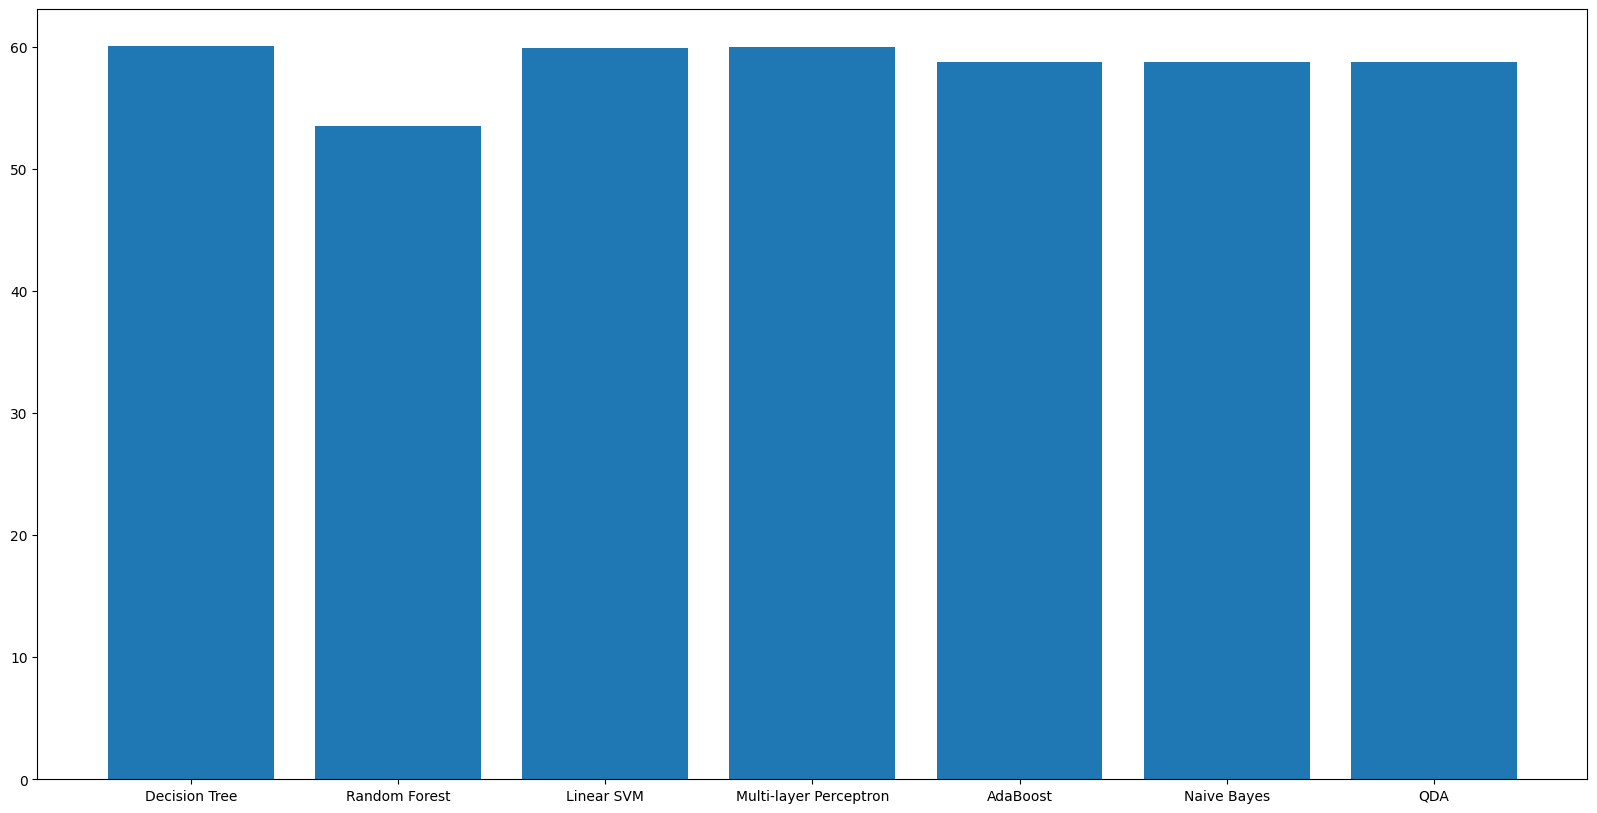


Best Classifier = Decision Tree, Score (test, accuracy) = 60.11


In [ ]:
# Comparision Plot
plt.figure(figsize=(20, 10))
plt.bar(names, score_all)
plt.show()


# Final Result
print()
print('Best Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

In [ ]:


clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

# Train random forest classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

# Train support vector machine classifier
clf_svm = SVC()
clf_svm.fit(X_train, y_train)

# Train multi-layer perceptron classifier
clf_mlp = MLPClassifier()
clf_mlp.fit(X_train, y_train)

# Predict output levels for test data using decision tree classifier
y_pred_dt = clf_dt.predict(X_test)

# Predict output levels for test data using random forest classifier
y_pred_rf = clf_rf.predict(X_test)

# Predict output levels for test data using support vector machine classifier
y_pred_svm = clf_svm.predict(X_test)

# Predict output levels for test data using multi-layer perceptron classifier
y_pred_mlp = clf_mlp.predict(X_test)

# Evaluate performance of decision tree classifier
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))

# Evaluate performance of random forest classifier
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Evaluate performance of support vector machine classifier
print("\nSupport Vector Machine Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))

# Evaluate performance of multi-layer perceptron classifier
print("\nMulti-layer Perceptron Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_mlp, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_mlp, average='weighted'))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Decision Tree Classifier:
Accuracy: 0.4380053908355795
Precision: 0.45582270469260544
Recall: 0.4380053908355795
F1 Score: 0.4465424810565869

Random Forest Classifier:
Accuracy: 0.5242587601078167
Precision: 0.4650441443437529
Recall: 0.5242587601078167
F1 Score: 0.4895337020750936

Support Vector Machine Classifier:
Accuracy: 0.5990566037735849
Precision: 0.4971840176689087
Recall: 0.5990566037735849
F1 Score: 0.4761602920201847

Multi-layer Perceptron Classifier:
Accuracy: 0.5977088948787062
Precision: 0.476162801516763
Recall: 0.5977088948787062
F1 Score: 0.49863251052525287


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

temmp_1972_Af=data_temp_country[data_temp_country["Code"]=="AFG"]
co2_1972_Af=df_co2_[df_co2_["Code"]=="AFG"]
data_AF=pd.merge(temmp_1972_Af,co2_1972_Af, on=["Code","Year"])

In [ ]:
data_AF=data_AF[data_AF["Year"]<1980]
data_AF=data_AF[data_AF["Year"]>1970]
data_AF=data_AF[["Change_temp","change_CO2"]]
data_AF=StandardScaler().fit_transform(data_AF)
data_AF

array([[ 1.25229395, -0.15663436],
       [-1.98887668, -0.24050877],
       [ 0.53265366, -0.03803899],
       [-0.80807155,  1.72824151],
       [-0.72625198, -0.81261689],
       [-0.43058581, -0.71705736],
       [ 1.05518317,  1.45308637],
       [ 0.34112148, -1.58380651],
       [ 0.77253375,  0.367335  ]])

In [ ]:
y_pred_mlp=clf_mlp.predict(data_AF)

In [ ]:
Pred=[]
print("Prediction for Afghanistan for year 1971-1979")
for i,j in zip(y_pred_mlp,["1971","1972","1973","1973","1975","1976","1977","1978","1979"]):
  Pred.append(result[i])
  print(j,"->",result[i])



Prediction for Afghanistan for year 1971-1979
1971 -> Drought
1972 -> Drought
1973 -> Drought
1973 -> Flood
1975 -> Flood
1976 -> Flood
1977 -> Flood
1978 -> Flood
1979 -> Flood


This prediction is only 55% correct, therefore there are 55% chance that the above natural disasters will take place. Hence country can prepare accordingly. To improve the prediction we need to include more data and other factors.

## Second Dataset: Crop Dataset
Here we are trying to predict which crop will be suitable given the input attributes.

In [ ]:
data_crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


<ipython-input-75-c9d0f3cb55d1>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_crop.corr(), annot=True,cmap='viridis')


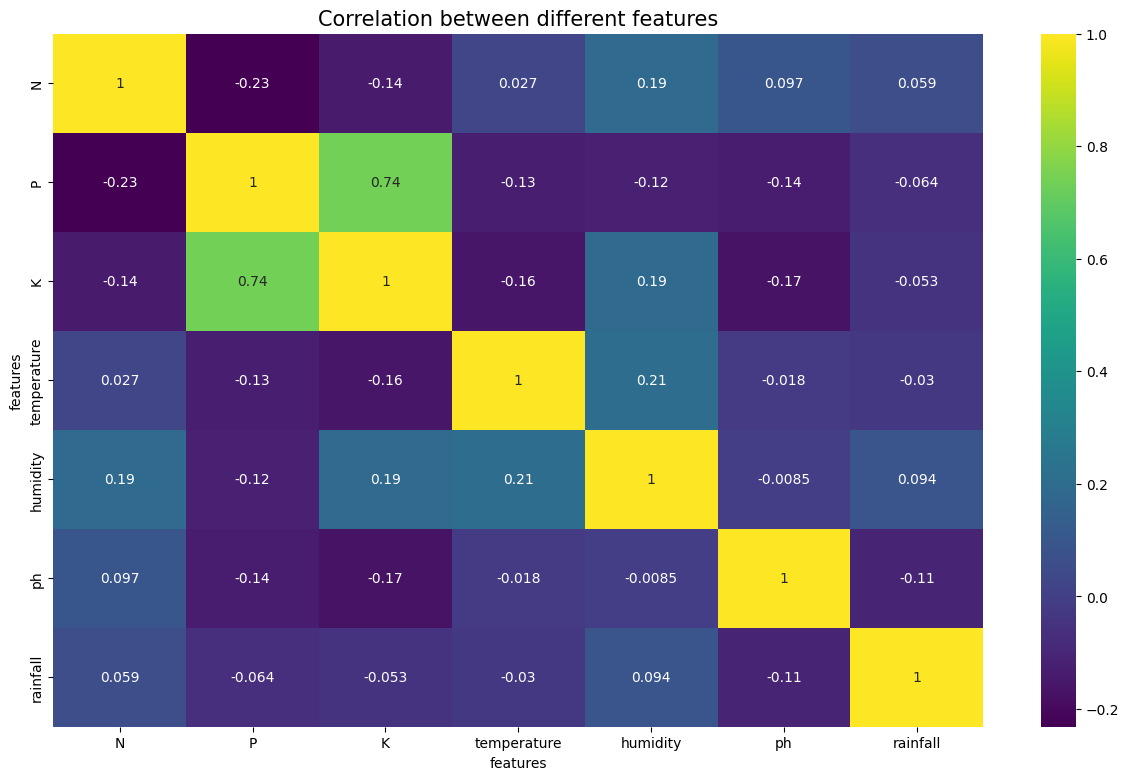

In [ ]:

#Seaborn is a high-level API for matplotlib, which takes care of a lot of the manual work.

#seaborn.heatmap automatically plots a gradient at the side of the chart etc.

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(data_crop.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [ ]:
features = data_crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = data_crop['label']

In [ ]:
data_crop['label'].nunique()

22

In [ ]:
data_crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
X, y = (features, target)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

#The Muller Loop

In [ ]:
#The Muller Loop
#Let’s approach classification as a set of experiments.
#https://github.com/aarsanjani/applied-ml-2020/blob/master/MullerLoop.ipynb


names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost", #"Neural Net"
         "Naive Bayes", "QDA"]#"XG Boost Classifier"
classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5),
    RandomForestClassifier(n_estimators=20, random_state=0),
    #MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),#xgb.XGBClassifier(),
    QuadraticDiscriminantAnalysis()]



# TODO (Apply): All cross-validation

max_score = 0.0
max_class = ''
timetaken=[]
score_all=[]
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    #predicted_values=v.predict(x_test)
#    accuracy =  np.mean(y_pred == y_test)100.0 *
#print("Accuracy:", accuracy)
    #score=metrics.accuracy_score(y_test, predicted_values)
    score = 100.0 * clf.score(X_test, y_test)
    score_all.append(score)
    timetaken.append((time.time() - start_time))
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))

    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Classifier = Nearest Neighbors, Score (test, accuracy) = 5.45, Training time = 0.03 seconds
Classifier = Linear SVM, Score (test, accuracy) = 3.64, Training time = 0.26 seconds
Classifier = RBF SVM, Score (test, accuracy) = 3.64, Training time = 0.36 seconds
Classifier = Decision Tree, Score (test, accuracy) = 3.86, Training time = 0.04 seconds
Classifier = Random Forest, Score (test, accuracy) = 4.55, Training time = 0.18 seconds
Classifier = AdaBoost, Score (test, accuracy) = 3.86, Training time = 0.41 seconds
Classifier = Naive Bayes, Score (test, accuracy) = 3.18, Training time = 0.02 seconds
Classifier = QDA, Score (test, accuracy) = 5.00, Training time = 0.01 seconds
--------------------------------------------------------------------------------
Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 5.45


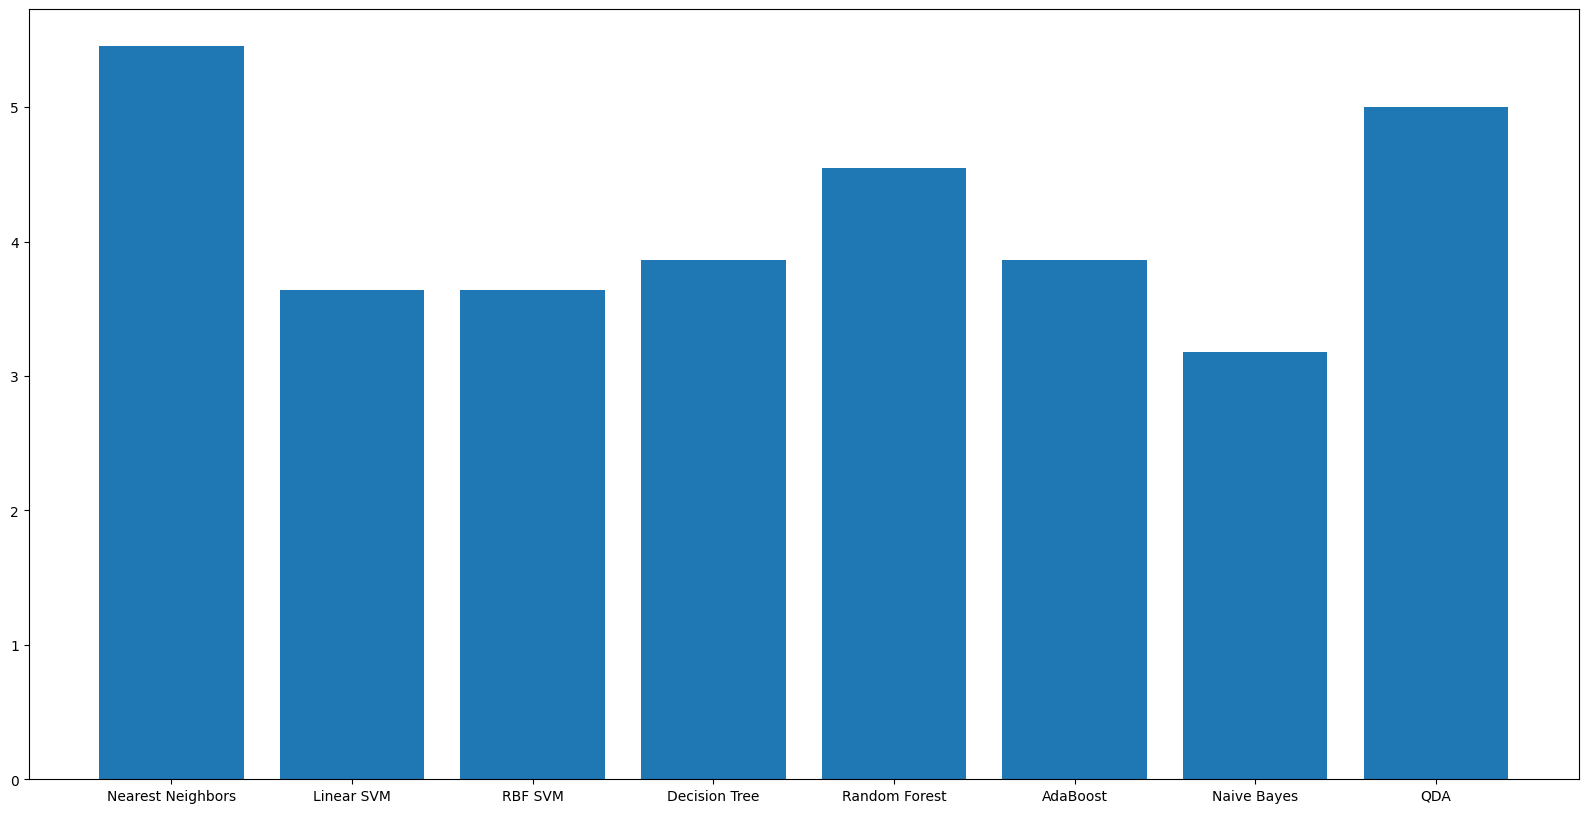


Best Classifier = Nearest Neighbors, Score (test, accuracy) = 5.45


In [ ]:
# Comparision Plot
plt.figure(figsize=(20, 10))
plt.bar(names, score_all)
plt.show()


# Final Result
print()
print('Best Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
print("Random Forest Accuracy is: ", x)


Random Forest Accuracy is:  0.990909090909091
